<a href="https://colab.research.google.com/github/leticiasbm/DSAnalytics/blob/main/MVP_Let%C3%ADcia_Santos_Batista_de_Melo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Letícia Santos Batista de Melo

**Matrícula:** 4052025000754

**Dataset:** [Thyroid Disease - Doença da Tireoide](https://archive.ics.uci.edu/dataset/102/thyroid+disease)


# Descrição do Problema

O conjunto de dados "Thyroid Disease" (Doença de Tireoide), especialmente o arquivo sick.data, é um conjunto multivariado real com informações clínicas detalhadas, coletadas de pacientes com suspeita ou diagnóstico de disfunções tireoidianas. Este dataset visa diagnosticar automaticamente o estado da tireoide (normal/doente), a partir de:



*   Exames hormonais (TSH, T3, T4);
*   Informações clínicas e comportamentais (gravidez, medicações, cirurgias);
* Dados demográficos (idade, sexo);
* Sinais indiretos de comprometimento endócrino (bócio, uso de medicações com lítio, etc.).











## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Problemas de tireoide são mais recorrentes em determinado gênero/idade? Mulheres são mais propensas a desenvolver problemas de tireoide?

- Há alguma relação entre a presença de doenças psiquiátricas e disfunções tireoidianas?

- Pacientes com TSH elevado têm maior possibilidade de serem diagnosticados com hipotireoidismo? Quais outros hormônios podem contribuir para esse diagnóstico?

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características, o objetivo é diagnosticar se há ou não disfunção tireoidiana (normal, doente) em determinado paciente.

## Seleção de Dados

O *dataset "Thyroid Disease"* (Doença de Tireoide) é um conjunto de dados disponível no UC Irvine Machine Learning Repository. Para sua utilização, é necessário baixar o arquivo .data disponível e importá-lo para o Colab.

## Atributos do Dataset

O *dataset "Thyroid Disease"* (Doença de Tireoide) contém 2799 amostras e 30 atributos, sendo:

Demográficos:

- **Age** (idade do paciente);
- **Sex** (sexo biológico do paciente - feminino/masculino);

Clínicos e Hormonais:

- **On_Thyroxine** (paciente faz uso de T4? - True/False);
- **Query_On_Thyroxine** (médico está considerando prescrever T4? - True/False);
- **On_Antithyroid_Medication** (usa medicamentos para reduzir atividade da tireoide? - True/False);
- **Sick** (está doente com alguma condição além da tireoidiana? - True/False);
- **Pregnant** (paciente está grávida? - True/False);
- **Thyroid_Surgery** (já passou por cirurgiana tireoide? - True/False);
- **I131_Treatment** (tratamento com iodo radioativo? - True/False);
- **Query_Hypothyroid** (suspeita de hipotireoidismo? - True/False);
- **Query_Hyperthyroid** (suspeita de hipertireoidismo? - True/False);
- **Lithium** (usa lítio? - True/False);
- **Goitre** (presença de bócio? - True/False);
- **Tumor** (possui algum tumor? - True/False);
- **Hypopituitary** (possui disfunção na hipófise? - True/False);
- **Psych** (possui histórico psiquiátrico? - True/False);
- **TSH_Measured** (foi feito o exame do hormônio? - True/False);
- **TSH** (nível do hormônio TSH (Hormônio Estimulante da Tireoide) - µIU/mL);
- **T3_Measured** (foi feito o exame do hormônio? - True/False);
- **T3** (nível do hormônio T3 (Triiodotironina) - ng/dL);
- **TT4_Measured** (foi feito o exame do hormônio? - True/False);
- **TT4** (nível do hormônio T4 (Tiroxina Total) - µg/dL);
- **T4U_Measured** (foi feito o exame do hormônio? - True/False);
- **T4U** (índice de captação da tiroxina);
- **FTI_Measured** (foi feito o exame do hormônio? - True/False);
- **FTI** (índice de T4 Livre - ng/dL);
- **TBG_Measured** (foi feito o exame do hormônio? - True/False);
- **TBG** (globulina ligadora de tiroxina - mg/L);
- **Referral_Source** (fonte de encaminhamento médico - hospital/autoencaminhado/médico);
- **Class** (diagnóstico final - negativo/doente).


# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do *dataset* a partir do GitHub.

In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#from imblearn.pipeline import Pipeline
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
#from sklearn.decomposition import PCA
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)
pd.set_option('future.no_silent_downcasting', True)
warnings.filterwarnings('ignore')

In [3]:
# Carregamento do conjunto de dados a partir do GitHub

!git clone --branch Sprint-01 https://github.com/leticiasbm/DSAnalytics.git

Cloning into 'DSAnalytics'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 42 (delta 19), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (42/42), 5.96 MiB | 3.15 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [4]:
# Importando conjunto de dados como .csv

data = pd.read_csv("/content/DSAnalytics/sick.data", sep = ",", encoding = "ISO-8859-1", decimal = ".")

In [5]:
# Armazenando o conjunto de dados em um DataFrame

dataframe = pd.DataFrame(data)

# Adicionando o nome das colunas ao DataFrame

dataframe.columns = ["Age", "Sex", "On_Thyroxine", "Query_On_Thyroxine", "On_Antithyroid_Medication", "Sick",
                     "Pregnant", "Thyroid_Surgery", "I131_Treatment", "Query_Hypothyroid", "Query_Hyperthyroid",
                     "Lithium", "Goitre", "Tumor", "Hypopituitary", "Psych", "TSH_Measured", "TSH", "T3_Measured", "T3",
                      "TT4_Measured", "TT4", "T4U_Measured", "T4U", "FTI_Measured", "FTI", "TBG_Measured", "TBG",
                      "Referral_Source", "Class"]
dataframe.head(5)

,Age,Sex,On_Thyroxine,Query_On_Thyroxine,On_Antithyroid_Medication,Sick,Pregnant,Thyroid_Surgery,I131_Treatment,Query_Hypothyroid,Query_Hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_Measured,TSH,T3_Measured,T3,TT4_Measured,TT4,T4U_Measured,T4U,FTI_Measured,FTI,TBG_Measured,TBG,Referral_Source,Class
0,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
1,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
2,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
3,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
4,18,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,?,t,183,t,1.3,t,141,f,?,other,negative.|3434


Como algumas colunas do DataFrame possuem valores binários, essas colunas terão seu tipo alterado para Boolean e os valores "f" e "t" serão alterados para False e True, respectivamente.

Além disso, pode-se perceber que existem muitos valores faltantes no dataset, marcados como "?". Esses valores serão substituídos por np.NaN neste momento.

In [6]:
# Substituindo valores das variáveis binárias

dataframe = dataframe.replace("f", False)
dataframe = dataframe.replace("t", True)

dataframe = dataframe.replace("F", 1) # Considerando que, para sex = F, 1
dataframe = dataframe.replace("M", 0) # Considerando que, para sex = M, 0

# Substituindo valores ausentes por np.nan

dataframe = dataframe.replace("?", np.nan)
dataframe.head()

,Age,Sex,On_Thyroxine,Query_On_Thyroxine,On_Antithyroid_Medication,Sick,Pregnant,Thyroid_Surgery,I131_Treatment,Query_Hypothyroid,Query_Hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_Measured,TSH,T3_Measured,T3,TT4_Measured,TT4,T4U_Measured,T4U,FTI_Measured,FTI,TBG_Measured,TBG,Referral_Source,Class
0,23,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,4.1,True,2,True,102,False,NaN,False,NaN,False,NaN,other,negative.|1442
1,46,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.98,False,NaN,True,109,True,0.91,True,120,False,NaN,other,negative.|2965
2,70,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.16,True,1.9,True,175,False,NaN,False,NaN,False,NaN,other,negative.|806
3,70,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.72,True,1.2,True,61,True,0.87,True,70,False,NaN,SVI,negative.|2807
4,18,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.03,False,NaN,True,183,True,1.3,True,141,False,NaN,other,negative.|3434


Na última coluna do DataFrame, "Class", deixaremos apenas o diagnóstico, sendo removidas as demais informações.

In [7]:
# Mantendo apenas a palavra do diagnóstico na coluna "class"

dataframe["Class"] = dataframe["Class"].str.split("|").str[0]
dataframe["Class"] = dataframe["Class"] .str.rstrip('.')

dataframe = dataframe.replace("negative", 0) # Considerando que, para class = negative, 0
dataframe = dataframe.replace("sick", 1) # Considerando que, para class = sick, 1

dataframe.head()

,Age,Sex,On_Thyroxine,Query_On_Thyroxine,On_Antithyroid_Medication,Sick,Pregnant,Thyroid_Surgery,I131_Treatment,Query_Hypothyroid,Query_Hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_Measured,TSH,T3_Measured,T3,TT4_Measured,TT4,T4U_Measured,T4U,FTI_Measured,FTI,TBG_Measured,TBG,Referral_Source,Class
0,23,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,4.1,True,2,True,102,False,NaN,False,NaN,False,NaN,other,0
1,46,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.98,False,NaN,True,109,True,0.91,True,120,False,NaN,other,0
2,70,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.16,True,1.9,True,175,False,NaN,False,NaN,False,NaN,other,0
3,70,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.72,True,1.2,True,61,True,0.87,True,70,False,NaN,SVI,0
4,18,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.03,False,NaN,True,183,True,1.3,True,141,False,NaN,other,0


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o *dataset "Thyroid Disease"* (Doença de Tireoide), visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O *dataset* possui 2799 instâncias (observações). Originalmente, possui 30 variáveis do tipo *object*. Visualizando os dados, sabe-se que, dessas, 8 são numéricas do tipo *float*, 21 são do tipo *bool* e 1 variável é categórica do tipo *object*.

As variáveis que não apresentam o tipo de dado correto serão alteradas neste tópico.

In [8]:
print(f"Total de instâncias: {len(dataframe)}")
print("\nTipos de dados por coluna:")
print(dataframe.info())

Total de instâncias: 2799

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2799 entries, 0 to 2798
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        2798 non-null   object
 1   Sex                        2689 non-null   object
 2   On_Thyroxine               2799 non-null   object
 3   Query_On_Thyroxine         2799 non-null   object
 4   On_Antithyroid_Medication  2799 non-null   object
 5   Sick                       2799 non-null   object
 6   Pregnant                   2799 non-null   object
 7   Thyroid_Surgery            2799 non-null   object
 8   I131_Treatment             2799 non-null   object
 9   Query_Hypothyroid          2799 non-null   object
 10  Query_Hyperthyroid         2799 non-null   object
 11  Lithium                    2799 non-null   object
 12  Goitre                     2799 non-null   object
 13  Tumor    

In [9]:
# Alterando o tipo de dado dos atributos

dataframe = dataframe.astype({"Age" : float, "Sex": float, "On_Thyroxine" : bool, "Query_On_Thyroxine" : bool, "On_Antithyroid_Medication" : bool,
                              "Sick" : bool, "Pregnant" : bool, "Thyroid_Surgery" : bool, "I131_Treatment" : bool, "Query_Hypothyroid" : bool,
                              "Query_Hyperthyroid" : bool, "Lithium" : bool, "Goitre" : bool, "Tumor" : bool, "Hypopituitary" : bool, "Psych" : bool,
                              "TSH_Measured" : bool, "T3_Measured" : bool, "TT4_Measured" : bool, "T4U_Measured" : bool, "FTI_Measured" : bool, "TBG_Measured" : bool,
                              "TSH" : float, "T3" : float, "TT4" : float, "T4U" : float, "FTI" : float, "TBG" : float, "Class" : float})

print(dataframe.dtypes)

Age                          float64
Sex                          float64
On_Thyroxine                    bool
Query_On_Thyroxine              bool
On_Antithyroid_Medication       bool
Sick                            bool
Pregnant                        bool
Thyroid_Surgery                 bool
I131_Treatment                  bool
Query_Hypothyroid               bool
Query_Hyperthyroid              bool
Lithium                         bool
Goitre                          bool
Tumor                           bool
Hypopituitary                   bool
Psych                           bool
TSH_Measured                    bool
TSH                          float64
T3_Measured                     bool
T3                           float64
TT4_Measured                    bool
TT4                          float64
T4U_Measured                    bool
T4U                          float64
FTI_Measured                    bool
FTI                          float64
TBG_Measured                    bool
T

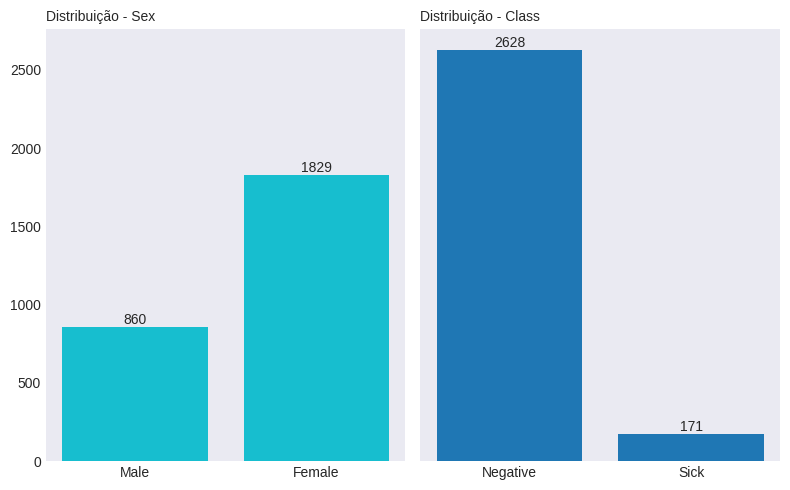

In [10]:
# Avaliando a distribuição das instâncias nas variáveis categóricas

# Configuração da paleta de cores
plt.style.use('seaborn-v0_8-dark')

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 5), sharey = True)

sex = ax[0].bar(dataframe["Sex"].value_counts().index, dataframe["Sex"].value_counts().values, color = "tab:cyan")
ax[0].set_title("Distribuição - Sex", loc = "left", fontsize = 10)
ax[0].bar_label(sex, fmt = "%.0f")
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["Male", "Female"])

cl = ax[1].bar(dataframe["Class"].value_counts().index, dataframe["Class"].value_counts(), color = "tab:blue")
ax[1].set_title("Distribuição - Class", loc = "left", fontsize = 10)
ax[1].bar_label(cl, fmt = "%.0f")
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["Negative", "Sick"])

plt.tight_layout()
plt.show()

Os gráficos de barra mostram que no conjunto de dados há maior prevalescência de amostras do sexo feminino e de diagnósticos negativos para doenças tireoidianas.

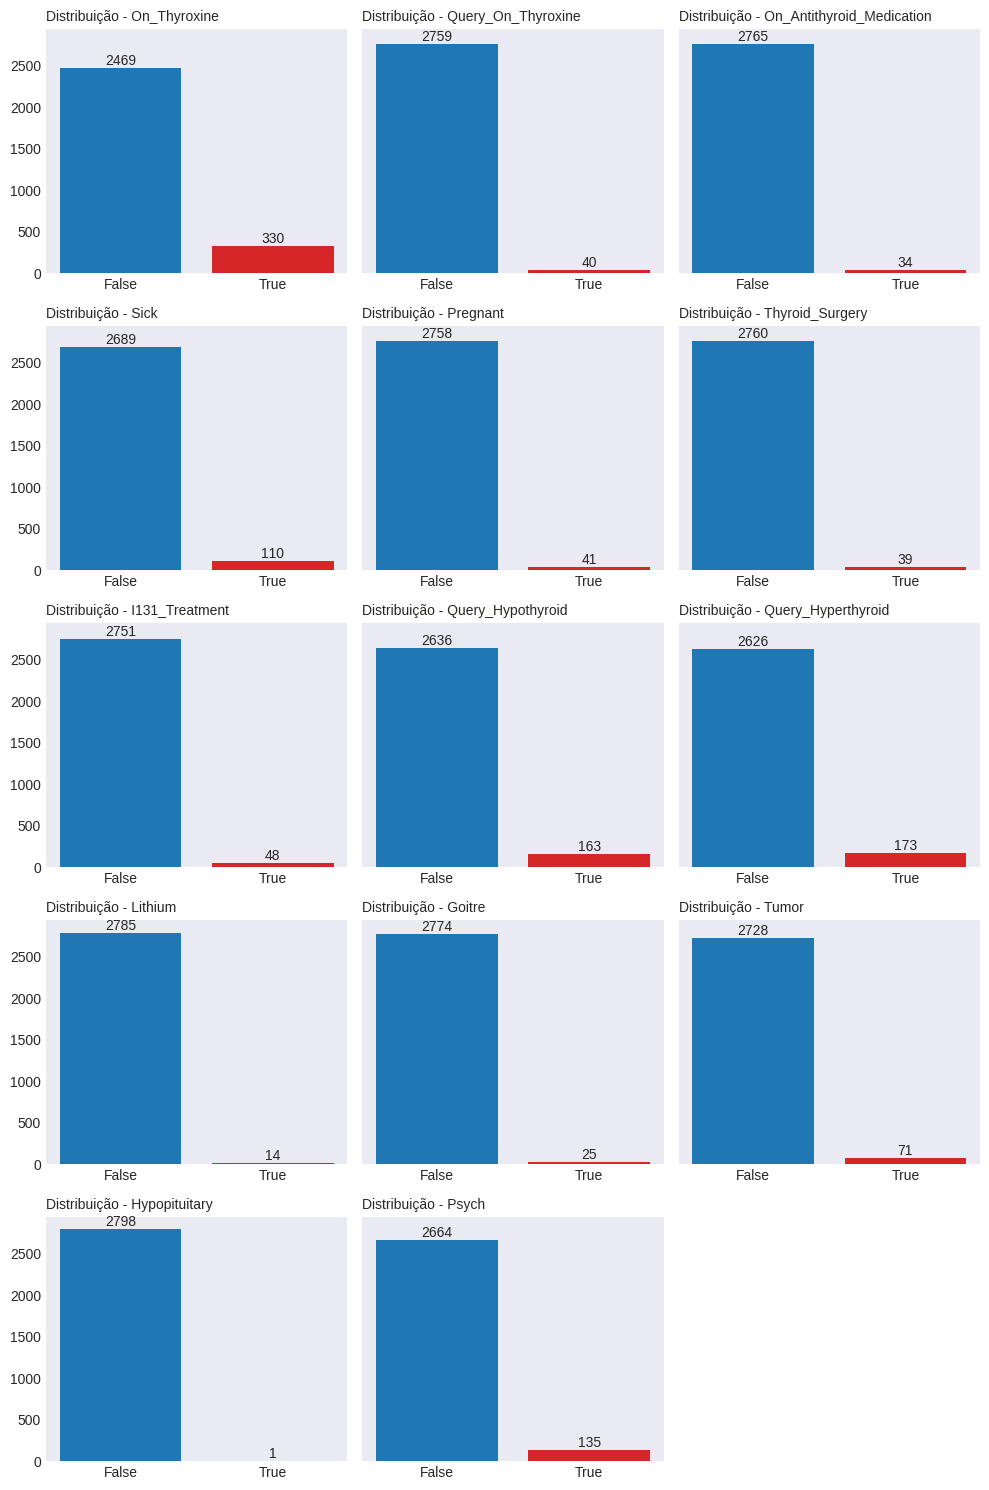

In [11]:
# Exibição Gráfica das Variáveis Booleanas

colunas_bool = ["On_Thyroxine", "Query_On_Thyroxine", "On_Antithyroid_Medication", "Sick", "Pregnant",
                "Thyroid_Surgery", "I131_Treatment", "Query_Hypothyroid", "Query_Hyperthyroid",
                "Lithium", "Goitre", "Tumor", "Hypopituitary", "Psych"]

fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize = (10, 15), sharey = True)
bar_colors = ['tab:blue', 'tab:red']
ax = ax.flatten()

for idx, col in enumerate(colunas_bool):
    counts = dataframe[col].value_counts()
    bars = ax[idx].bar(counts.index.astype(str), counts.values, color = bar_colors)
    ax[idx].set_title(f"Distribuição - {col}", loc = "left", fontsize = 10)
    ax[idx].bar_label(bars, fmt="%.0f")

for j in range(len(colunas_bool), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

Com base nos gráficos anteriores, é possível identificar que menos da metade dos pacientes faz uso da tiroxina, hormônio T4 para a tireoide. Isso condiz com a baixa quantidade de pacientes diagnosticados com disfunções tireoidianas vista anteriormente.

Uma das condutas de tratamento para câncer de tireoide é a remoção completa da glândula com posterior tratamento com iodo radioativo. Pelo gráfico, a quantidade de pessoas que tiveram a tireoide removida é próxima da quantidade de pessoas que fizeram tratamento com iodo radioativo, o que indica possível correlação entre as variáveis.

Demais correlações serão avaliadas nos tópicos a seguir.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [12]:
# Estatísticas Descritivas Básicas

dataframe.describe()

,Age,Sex,TSH,T3,TT4,T4U,FTI,TBG,Class
count,2798.000000,2689.000000,2515.000000,2214.000000,2615.000000,2502.000000,2504.000000,0.0,2799.000000
mean,51.848106,0.680179,4.673491,2.024752,109.066310,0.997855,110.788698,NaN,0.061093
std,20.463790,0.466494,21.453613,0.824725,35.397841,0.194409,32.890535,NaN,0.239544
min,1.000000,0.000000,0.005000,0.050000,2.000000,0.310000,2.000000,NaN,0.000000
25%,36.000000,0.000000,0.440000,1.600000,88.000000,0.880000,93.000000,NaN,0.000000
50%,54.000000,1.000000,1.400000,2.000000,104.000000,0.980000,107.000000,NaN,0.000000
75%,67.000000,1.000000,2.600000,2.400000,125.000000,1.080000,124.000000,NaN,0.000000
max,455.000000,1.000000,478.000000,10.600000,430.000000,2.120000,395.000000,NaN,1.000000


É provável que os valores máximos para Age e TSH sejam *outliers*.

### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [13]:
# Média dos atributos numéricos do dataset

dataframe.describe().loc['mean']

,mean
Age,51.848106
Sex,0.680179
TSH,4.673491
T3,2.024752
TT4,109.066310
T4U,0.997855
FTI,110.788698
TBG,NaN
Class,0.061093


Como pode ser visto no conjunto de dados, não existem dados para a coluna TBG, o que possibilita sua remoção do dataset. O eixo X dos histogramas de TSH e Age possuem um grande espaço sem dados numéricos significativos, o que indica a possível presença de *outliers*.

In [14]:
dataframe.drop(["TBG", "Referral_Source"], axis = 1, inplace = True)

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [15]:
# Desvio padrão dos atributos numéricos do dataset

dataframe.describe().loc['std']

,std
Age,20.463790
Sex,0.466494
TSH,21.453613
T3,0.824725
TT4,35.397841
T4U,0.194409
FTI,32.890535
Class,0.239544


O desvio padrão acentuado nas colunas Age, TSH, TT4 e FTI, somados à visualização dos dados no histograma, indica a possível presença de *outliers*, que influenciaram o valor da média e, consequentemente, o valor do desvio padrão. Um gráfico interessante para mostrar o desvio padrão é o gráfico de barras com erro:

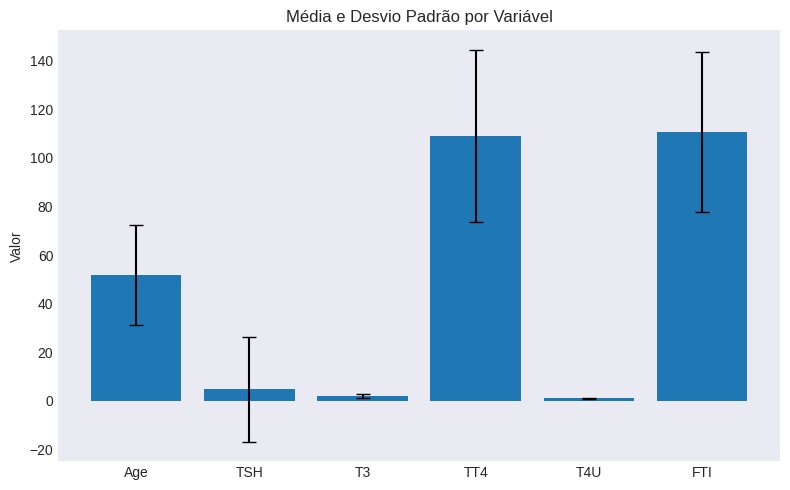

In [16]:
# Gráfico de Barras com Erro

colunas_float = ["Age", "TSH", "T3", "TT4", "T4U", "FTI"]

fig, ax = plt.subplots(figsize = (8, 5))

for i, col in enumerate(colunas_float):
    media = dataframe[col].mean()
    desvio = dataframe[col].std()
    ax.bar(col, media, yerr = desvio, capsize = 5, color="tab:blue")

ax.set_title("Média e Desvio Padrão por Variável", fontsize = 12)
ax.set_ylabel("Valor")

plt.tight_layout()
plt.show()

Como pode ser visto no gráfico de barras com erro exibido anteriormente, os dados de T3 e T4U apresentam desvio padrão pequeno, se comparado aos demais, o que corrobora com a hipótese de presença de *outliers* nos demais dados.

## Tratamento de Valores Nulos

O tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

Alguns valores nulos do dataset podem ocorrer devido a ausência do exame de medição do hormônio. Portanto, para exames não realizados, o valor nulo do hormônio será mantido como ausente. Para exames realizados, mas sem valor do hormônio, estes valores nulos serão substituídos pela mediana dos dados.


In [17]:
# Verifica se existem valores nulos:

dataframe.isna().sum()

,0
Age,1
Sex,110
On_Thyroxine,0
Query_On_Thyroxine,0
On_Antithyroid_Medication,0
Sick,0
Pregnant,0
Thyroid_Surgery,0
I131_Treatment,0
Query_Hypothyroid,0


In [18]:
# Aqui é possível observar que todos os valores faltantes de TSH são devido à ausência de medição

dataframe[dataframe["TSH_Measured"] == False].isna().sum()

# Aqui é possível observar que todos os valores faltantes de T3 são devido à ausência de medição

dataframe[dataframe["T3_Measured"] == False].isna().sum()

# Aqui é possível observar que todos os valores faltantes de TT4 são devido à ausência de medição

dataframe[dataframe["TT4_Measured"] == False].isna().sum()

# Aqui é possível observar que todos os valores faltantes de T4U são devido à ausência de medição

dataframe[dataframe["T4U_Measured"] == False].isna().sum()

# Aqui é possível observar que todos os valores faltantes de FTI são devido à ausência de medição

dataframe[dataframe["FTI_Measured"] == False].isna().sum()

,0
Age,0
Sex,17
On_Thyroxine,0
Query_On_Thyroxine,0
On_Antithyroid_Medication,0
Sick,0
Pregnant,0
Thyroid_Surgery,0
I131_Treatment,0
Query_Hypothyroid,0


Como foi identificado anteriormente, todos os valores faltantes dos hormônios se devem à não realização do exame para medição, o que pode derivar de algum critério médico. Sendo assim, não serão imputados valores para substituí-los.

Na coluna de "Age", há um valor faltante, que será substituído pela mediana dos dados.

In [19]:
dataframe["Age"] = dataframe.groupby("Class")["Age"].transform(lambda x: x.fillna(x.median()))

In [20]:
# Verifica se existem valores nulos na coluna Age:

dataframe.isna().sum()

,0
Age,0
Sex,110
On_Thyroxine,0
Query_On_Thyroxine,0
On_Antithyroid_Medication,0
Sick,0
Pregnant,0
Thyroid_Surgery,0
I131_Treatment,0
Query_Hypothyroid,0


## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

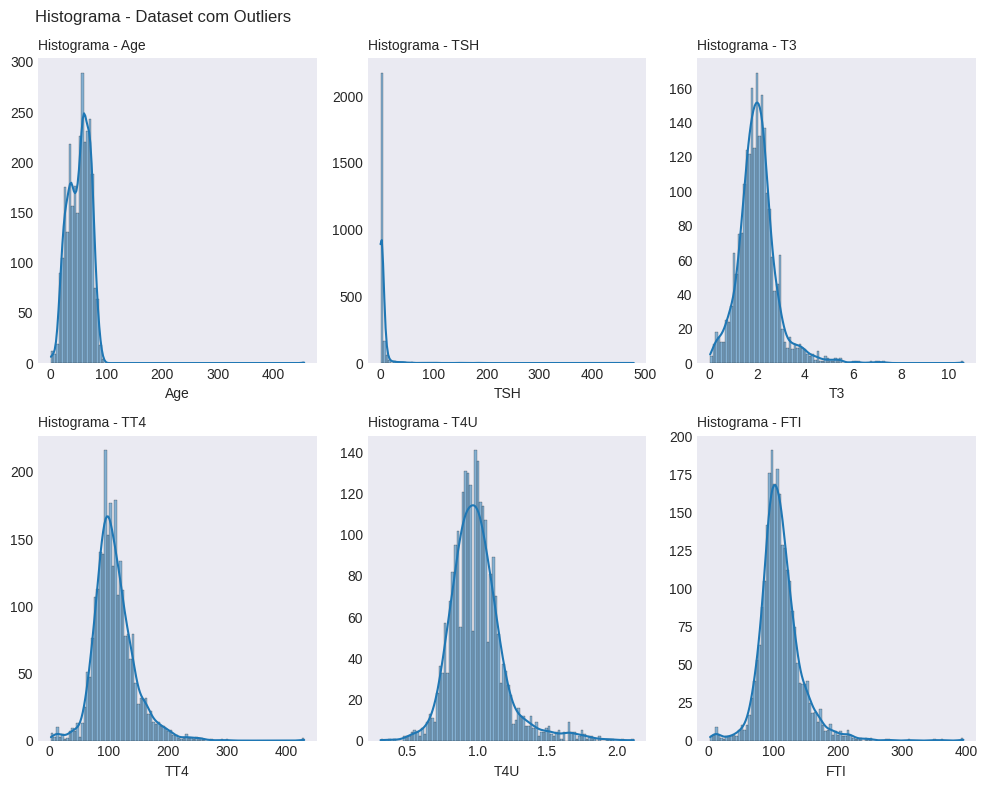

In [21]:
# Histograma para visualizar a distribuição dos valores numéricos

colunas_float = ["Age", "TSH", "T3", "TT4", "T4U", "FTI"]

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 8))
ax = ax.flatten()

for idx, col in enumerate(colunas_float):
    dados = dataframe[col].dropna()
    sns.histplot(dados, bins = 100, kde = True, ax = ax[idx], color = "tab:blue")
    ax[idx].set_title(f"Histograma - {col}", loc = "left", fontsize = 10)
    ax[idx].set_ylabel("")

    xmin, xmax = dados.min(), dados.max()
    margem = (xmax - xmin) * 0.05
    ax[idx].set_xlim(xmin - margem, xmax + margem)

for j in range(len(colunas_float), len(ax)):
    fig.delaxes(ax[j])

plt.suptitle("Histograma - Dataset com Outliers", ha = "left", x = 0.04)
plt.tight_layout()
plt.show()

Analisando os resultados do histograma anterior para as variáveis numéricas, temos:



*   **Age**: Observamos anteriormente a possível presença de *outliers* nos dados de idade. O histograma mostra a distribuição da idade dos pacientes da pesquisa. A curva de densidade estimada (KDE) indica que a distribuição parece bimodal, indicando a presença de duas faixas etárias predominantes na pesquisa. A extensão do KDE para direita do eixo X confirma a presença de outliers na amostra.

*   **TSH**: Observamos anteriormente a possível presença de *outliers* nos dados de TSH. Com relação aos dados de TSH, observa-se que a distribuição é unimodal e que o valor mínimo é 0 (limite inferior do TSH). A extensão do KDE para direita do eixo X confirma a presença de outliers na amostra.

* **T3**: Como observamos no gráfico de barra com erros, o T3 possui desvio padrão pequeno, o que não indica a presença significativa de *outliers* nos dados. Pela curva de densidade estimada (KDE), os dados estão concentrados entre 0 e 4 e a distribuição é unimodal.

* **TT4**: Possui distribuição unimodal e presença de possíveis *outliers* devido a extensão da KDE para direita do eixo X.

* **T4U**: Como observamos no gráfico de barra com erros, o T4U possui desvio padrão pequeno, o que não indica a presença significativa de *outliers* nos dados. Pela curva de densidade estimada (KDE), os dados estão concentrados entre 0,5 e 2 e a distribuição é unimodal.

* **FTI**: Possui distribuição unimodal e presença de possíveis *outliers* devido a extensão da KDE para direita do eixo X.



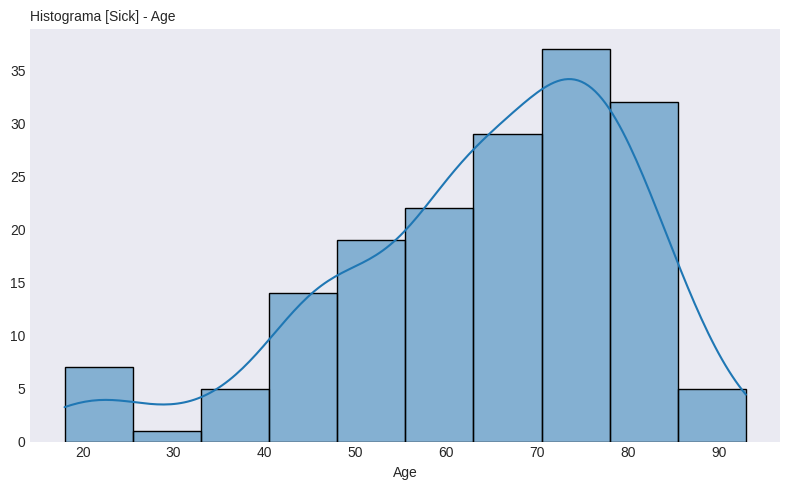

In [55]:
# Análise de diagnóstico de doença por faixa etária

dataframe_sick = dataframe[dataframe["Class"] == 1]

fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(dataframe_sick["Age"].dropna(), bins = 10, kde = True, color = "tab:blue")
ax.set_title(f"Histograma [Sick] - Age", loc = "left", fontsize = 10)
ax.set_ylabel("")
plt.tight_layout()
plt.show()

In [64]:
# Análise de diagnóstico de doença por sexo

dataframe_sick = dataframe[dataframe["Class"] == 1]
dataframe_sick.groupby("Sex")["Class"].count()

,Class
Sex,
0.0,67
1.0,100


## Boxplot

Para entender as diferenças entre os diagnósticos, devemos olhar como se comportam os valores quando agrupados por diagnóstico (negativo/doente). Isso nos permite comparar a média, mediana e desvio padrão de cada diagnóstico, além de visualizar suas distribuições por meio de boxplots.


In [22]:
# Estatísticas descritivas agrupadas por diagnóstico

dataframe.groupby("Class").describe()

Age                                                          Sex  \
        count       mean        std   min   25%   50%   75%    max   count   
Class                                                                        
0.0    2628.0  51.049467  20.462557   1.0  35.0  53.0  66.0  455.0  2522.0   
1.0     171.0  64.128655  16.062226  18.0  55.0  67.0  76.0   93.0   167.0   

                                                       TSH            \
           mean       std  min  25%  50%  75%  max   count      mean   
Class                                                                  
0.0    0.685567  0.464382  0.0  0.0  1.0  1.0  1.0  2346.0  4.689314   
1.0    0.598802  0.491615  0.0  0.0  1.0  1.0  1.0   169.0  4.453846   

                                                    T3                     \
             std    min   25%  50%  75%    max   count      mean      std   
Class                                                                       
0.0    21.874993  0.005  0.45  1.4  2.6  478.0  2045.0  2.117579  0.77767   
1.0    14.425553  0.005  0.37  1.5  3.6  143.0   169.0  0.901479  0.47692   

                                     TT4                                     \
        min  25%  50%  75%   max   count        mean        std   min   25%   
Class                                                                         
0.0    0.05  1.7  2.0  2.4  10.6  2444.0  110.104910  35.306792   2.0  89.0   
1.0    0.05  0.6  0.9  1.0   2.6   171.0   94.222222  33.402673  19.0  72.0   

                               T4U                                          \
         50%    75%    max   count      mean       std   min     25%   50%   
Class                                                                        
0.0    105.0  126.0  430.0  2336.0  1.009497  0.192859  0.31  0.8900  0.99   
1.0     87.0  110.0  192.0   166.0  0.834036  0.132656  0.48  0.7625  0.83   

                        FTI                                                   \
          75%   max   count        mean        std   min   25%    50%    75%   
Class                                                                          
0.0    1.0900  2.12  2338.0  110.662917  32.730514   2.0  93.0  107.0  124.0   
1.0    0.9075  1.14   166.0  112.560241  35.123928  17.0  93.0  108.0  129.0   

              
         max  
Class         
0.0    395.0  
1.0    219.0

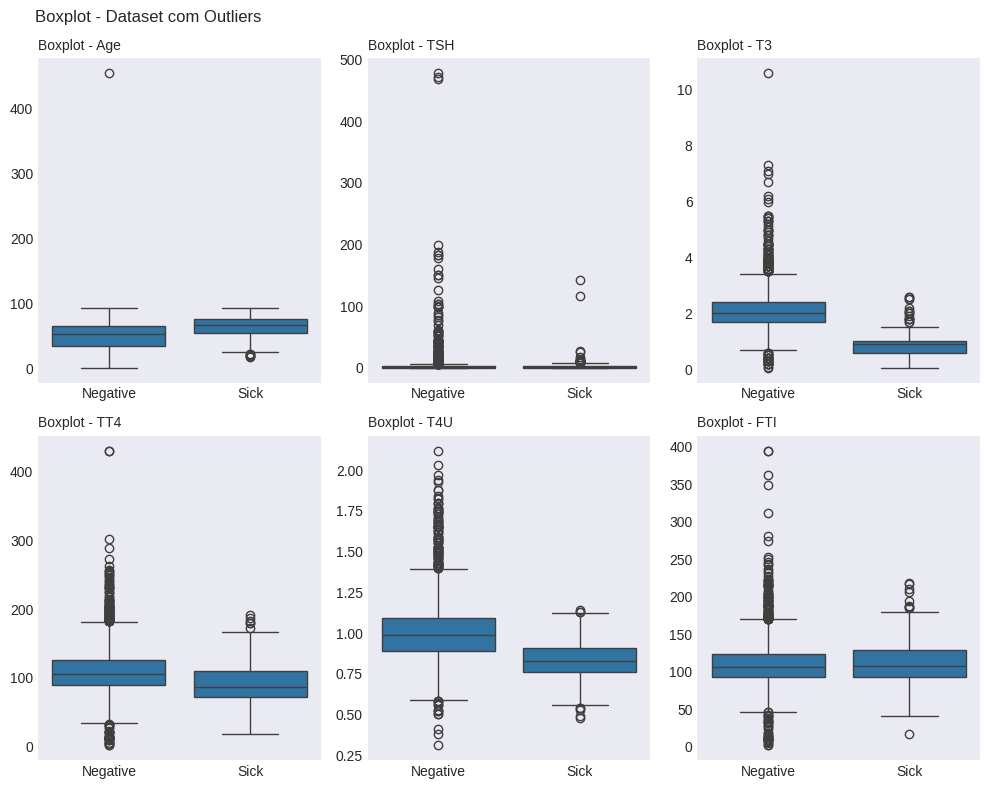

In [23]:
#Boxplot das variáveis numéricas por diagnóstico

colunas_float = ["Age", "TSH", "T3", "TT4", "T4U", "FTI"]

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 8))
ax = ax.flatten()

for idx, col in enumerate(colunas_float):
    dados = dataframe[col].dropna()
    sns.boxplot(x = dataframe["Class"], y = dados, color = "tab:blue", ax = ax[idx])
    ax[idx].set_title(f"Boxplot - {col}", loc = "left", fontsize = 10)
    ax[idx].set_ylabel("")
    ax[idx].set_xlabel("", loc = "left", fontsize = 10)
    ax[idx].set_xticks([0, 1])
    ax[idx].set_xticklabels(["Negative", "Sick"])

for j in range(len(colunas_float), len(ax)):
    fig.delaxes(ax[j])

plt.suptitle("Boxplot - Dataset com Outliers", ha = "left", x = 0.04)
plt.tight_layout()
plt.show()



*   Todas as variáveis analisadas apresentam valores atípicos (outliers), com destaque para o grupo negative, que mostra maior concentração de outliers em variáveis como TSH e TT4.

*   A distribuição de idade entre indivíduos com e sem diagnóstico de problemas na tireoide é semelhante, com uma leve tendência de maior idade no grupo sick.

* A presença de muitos *outliers* distorceu o boxplot do TSH, o que dificulta a visualização da mediana e da amplitude interquartil (caixa).

* Os níveis de T3 e T4U são consistentemente menores em indivíduos do grupo sick, o que pode refletir disfunções tireoidianas ou efeitos secundários da doença.

* Enquanto TT4 apresenta grande variabilidade nos dois grupos, FTI mostra uma distribuição mais concentrada e menos dispersa.



## Remoção de Outliers

In [24]:
#Remoção de Outliers

colunas_float = ["Age", "TSH", "T3", "TT4", "T4U", "FTI"]

def remover_outliers_iqr(df, colunas):
    dataframe_new = dataframe.copy()
    for col in colunas:
        Q1 = dataframe_new[col].quantile(0.25)
        Q3 = dataframe_new[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        dataframe_new = dataframe_new[(dataframe_new[col] >= limite_inferior) & (dataframe_new[col] <= limite_superior)]
    return dataframe_new

df_sem_outliers = remover_outliers_iqr(dataframe, colunas_float)

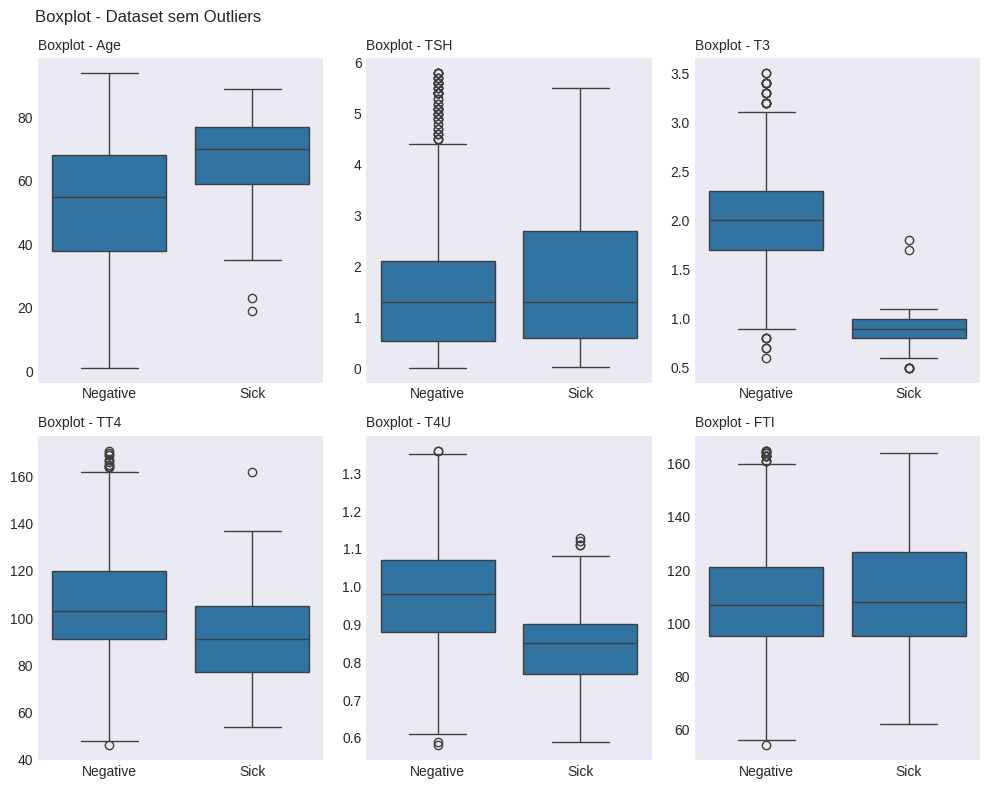

In [25]:
#Boxplot das variáveis numéricas por diagnóstico

colunas_float = ["Age", "TSH", "T3", "TT4", "T4U", "FTI"]

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 8))
ax = ax.flatten()

for idx, col in enumerate(colunas_float):
    dados = df_sem_outliers[col].dropna()
    sns.boxplot(x = df_sem_outliers["Class"], y = dados, color = "tab:blue", ax = ax[idx])
    ax[idx].set_title(f"Boxplot - {col}", loc = "left", fontsize = 10)
    ax[idx].set_ylabel("")
    ax[idx].set_xlabel("", loc = "left", fontsize = 10)
    ax[idx].set_xticks([0, 1])
    ax[idx].set_xticklabels(["Negative", "Sick"])

for j in range(len(colunas_float), len(ax)):
    fig.delaxes(ax[j])

plt.suptitle("Boxplot - Dataset sem Outliers", ha = "left", x = 0.04)
plt.tight_layout()
plt.show()

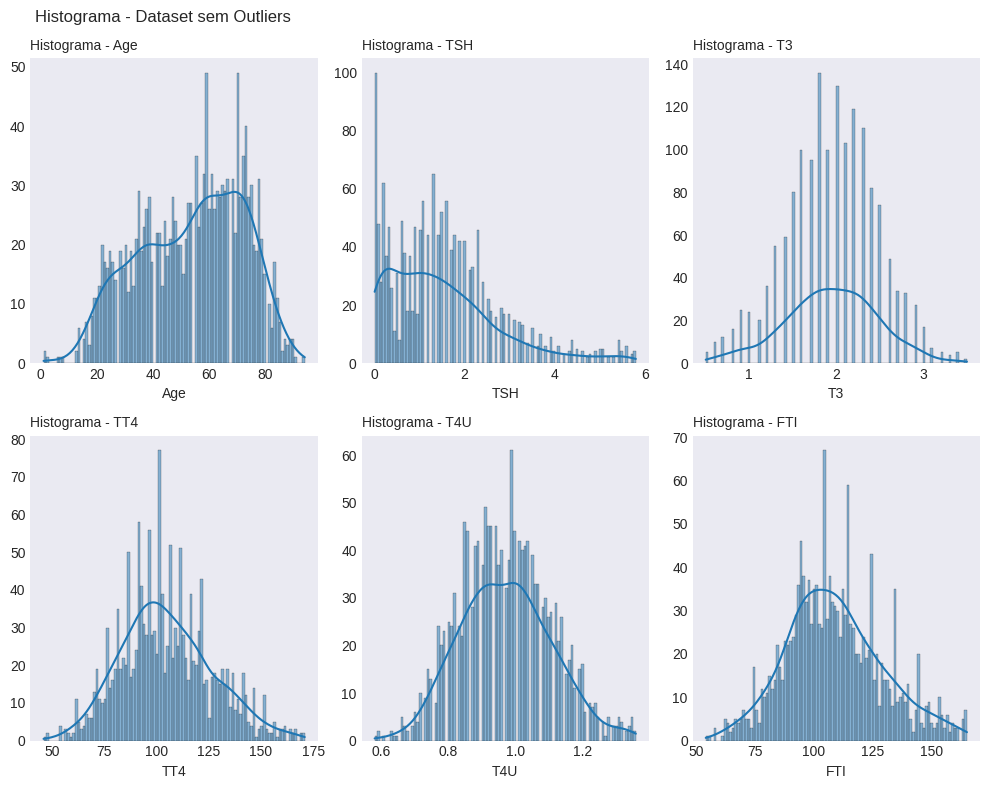

In [26]:
# Histograma para visualizar a distribuição dos valores numéricos

colunas_float = ["Age", "TSH", "T3", "TT4", "T4U", "FTI"]

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 8))
ax = ax.flatten()

for idx, col in enumerate(colunas_float):
    dados = df_sem_outliers[col].dropna()
    sns.histplot(dados, bins = 100, kde = True, ax = ax[idx], color = "tab:blue")
    ax[idx].set_title(f"Histograma - {col}", loc = "left", fontsize = 10)
    ax[idx].set_ylabel("")

    xmin, xmax = dados.min(), dados.max()
    margem = (xmax - xmin) * 0.05
    ax[idx].set_xlim(xmin - margem, xmax + margem)

for j in range(len(colunas_float), len(ax)):
    fig.delaxes(ax[j])

plt.suptitle("Histograma - Dataset sem Outliers", ha = "left", x = 0.04)
plt.tight_layout()
plt.show()

É possível observar que a remoção de outliers acabou removendo dados importantes de idade, TSH e, principalmente, de T3, diminuindo significativamente a quantidade de dados dessa amostra. Será utilizada a técnica de **Winsorização**, que substitui os outliers pelos limites superiores/inferiores do IQR ou percentis, reduzindo o impacto dos outliers, mas sem remover os dados.

## Winsorização

In [27]:
def winsorizacao(series, limits = (0.01, 0.01)):
    return stats.mstats.winsorize(series, limits = limits)

df_winsorizada = dataframe.copy()

for col in ["Age", "TSH", "T3", "TT4", "T4U", "FTI"]:

    df_winsorizada[col] = winsorizacao(dataframe[col], limits = (0.01, 0.01))

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [28]:
# Matriz de correlação - dataframe com outliers

print("\nMatriz de Correlação:")
dataframe[["Age", "Sex", "TSH", "T3", "TT4", "T4U", "FTI", "Class"]].dropna().corr()


Matriz de Correlação:


,Age,Sex,TSH,T3,TT4,T4U,FTI,Class
Age,1.000000,0.022511,-0.030226,-0.255560,-0.074410,-0.169507,0.030345,0.162443
Sex,0.022511,1.000000,0.039993,0.071408,0.161650,0.245419,0.019654,-0.027902
TSH,-0.030226,0.039993,1.000000,-0.180307,-0.288274,0.056063,-0.331076,0.002732
T3,-0.255560,0.071408,-0.180307,1.000000,0.581599,0.465705,0.346413,-0.401313
TT4,-0.074410,0.161650,-0.288274,0.581599,1.000000,0.450192,0.786288,-0.120153
T4U,-0.169507,0.245419,0.056063,0.465705,0.450192,1.000000,-0.171238,-0.245547
FTI,0.030345,0.019654,-0.331076,0.346413,0.786288,-0.171238,1.000000,0.032737
Class,0.162443,-0.027902,0.002732,-0.401313,-0.120153,-0.245547,0.032737,1.000000


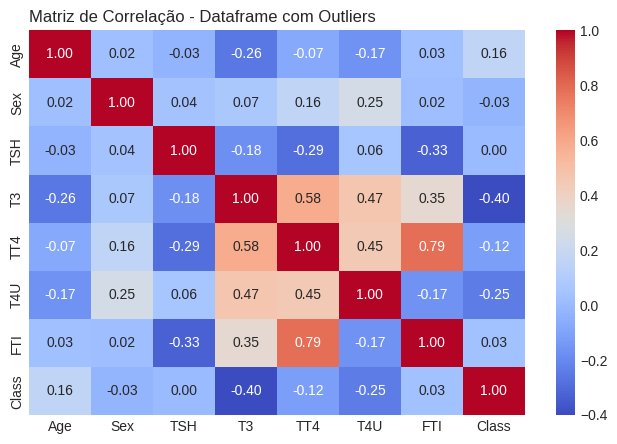

In [35]:
# Heatmap das variáveis - com outliers

plt.figure(figsize = (8, 5))
sns.heatmap(dataframe[["Age", "Sex", "TSH", "T3", "TT4", "T4U", "FTI", "Class"]].dropna().corr(), annot=True, cmap = "coolwarm", fmt= ".2f")
plt.title("Matriz de Correlação - Dataframe com Outliers", loc = "left")
plt.show()

* O mapa de calor da matriz de correlação revela fortes correlações positivas (0,8) entre TT4 (Tiroxina Total) e FTI (Índice de Tiroxina Livre), pois quanto maior a Tiroxina Total, maior deve ser a Tiroxina Livre para posterior conversão em T3.

* Há também correlação positiva moderada (0,56) entre TT4 (Tiroxina Total) e T3 (Triiodotironina), já que, biologicamente, o T4 é convertido em T3 (hormônio ativo da tireoide).

* Há correlação positiva fraca (< 0,5) entre T3 e FTI; T3 e T4U; TT4 e T4U).

* As demais correlações não mencionadas são pouco expressivas.



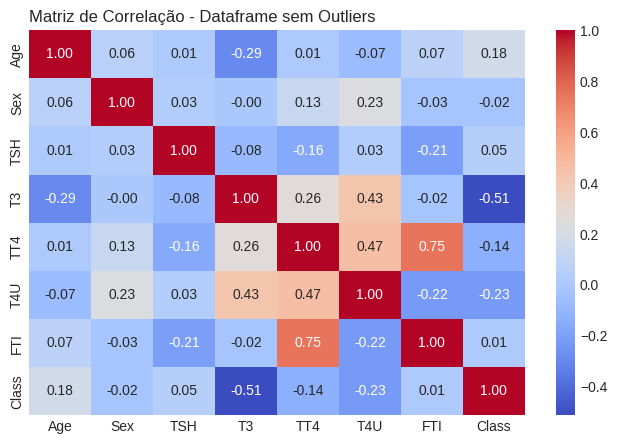

In [36]:
# Heatmap das variáveis - sem outliers

plt.figure(figsize = (8, 5))
sns.heatmap(df_sem_outliers[["Age", "Sex", "TSH", "T3", "TT4", "T4U", "FTI", "Class"]].dropna().corr(), annot=True, cmap = "coolwarm", fmt= ".2f")
plt.title("Matriz de Correlação - Dataframe sem Outliers", loc = "left")
plt.show()

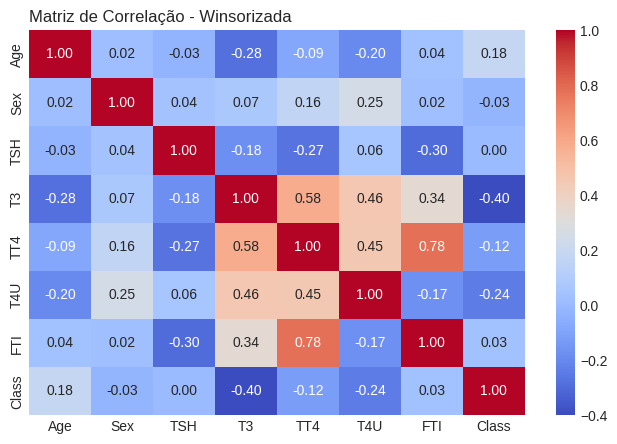

In [37]:
# Heatmap das variáveis - Winsorizada

plt.figure(figsize = (8, 5))
sns.heatmap(df_winsorizada[["Age", "Sex", "TSH", "T3", "TT4", "T4U", "FTI", "Class"]].dropna().corr(), annot=True, cmap = "coolwarm", fmt= ".2f")
plt.title("Matriz de Correlação - Winsorizada", loc = "left")
plt.show()

A remoção dos outliers em algumas colunas removeu valores extremos, mas reais, que poderiam indicar patologias reais e que tornavam a correlação entre variáveis maior. Observa-se que a matriz de correlação para o dataframe Winsorizado removeu o impacto dos outliers, mas preservou a relação entre os dados. Dessa forma, a análise será seguida com os **dados winsorizados**.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [32]:
df_winsorizada.head()

,Age,Sex,On_Thyroxine,Query_On_Thyroxine,On_Antithyroid_Medication,Sick,Pregnant,Thyroid_Surgery,I131_Treatment,Query_Hypothyroid,Query_Hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_Measured,TSH,T3_Measured,T3,TT4_Measured,TT4,T4U_Measured,T4U,FTI_Measured,FTI,TBG_Measured,Class
0,23.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,4.10,True,2.0,True,102.0,False,NaN,False,NaN,False,0.0
1,46.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.98,False,NaN,True,109.0,True,0.91,True,120.0,False,0.0
2,70.0,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.16,True,1.9,True,175.0,False,NaN,False,NaN,False,0.0
3,70.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.72,True,1.2,True,61.0,True,0.87,True,70.0,False,0.0
4,18.0,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.03,False,NaN,True,183.0,True,1.30,True,141.0,False,0.0


In [33]:
# Separar Features (X) e Target (Y)

X = df_winsorizada.drop("Class", axis = 1)
y = df_winsorizada["Class"]

In [38]:
# Divisão - Treino e Teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [39]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de Y_train: {y_train.shape}")
print(f"Dimensões de Y_test: {y_test.shape}")

Dimensões de X_train: (1959, 27)
Dimensões de X_test: (840, 27)
Dimensões de Y_train: (1959,)
Dimensões de Y_test: (840,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [40]:
# Inicializar o MinMaxScaler

scaler_norm = MinMaxScaler()

In [41]:
# Aprende min e max APENAS de X_train

scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)

# Usa a média e o desvio padrão aprendidos de X_train

X_test_normalized = scaler_norm.transform(X_test)

In [42]:
# Exibir as primeiras linhas dos dados normalizados

df_normalized = pd.DataFrame(X_train_normalized, columns = X_train.columns)
df_normalized.head()

,Age,Sex,On_Thyroxine,Query_On_Thyroxine,On_Antithyroid_Medication,Sick,Pregnant,Thyroid_Surgery,I131_Treatment,Query_Hypothyroid,Query_Hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_Measured,TSH,T3_Measured,T3,TT4_Measured,TT4,T4U_Measured,T4U,FTI_Measured,FTI,TBG_Measured
0,0.702703,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.005429,1.0,0.184466,1.0,0.114144,1.0,0.267606,1.0,0.113260,0.0
1,0.391892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.005847,1.0,0.165049,1.0,0.101737,1.0,0.183099,1.0,0.124309,0.0
2,0.581081,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.010868,0.0,NaN,1.0,0.272953,1.0,0.471831,1.0,0.204420,0.0
3,0.472973,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000303,1.0,0.165049,1.0,0.240695,1.0,0.246479,1.0,0.267956,0.0
4,0.770270,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000324,1.0,0.155340,1.0,0.367246,0.0,NaN,0.0,NaN,0.0


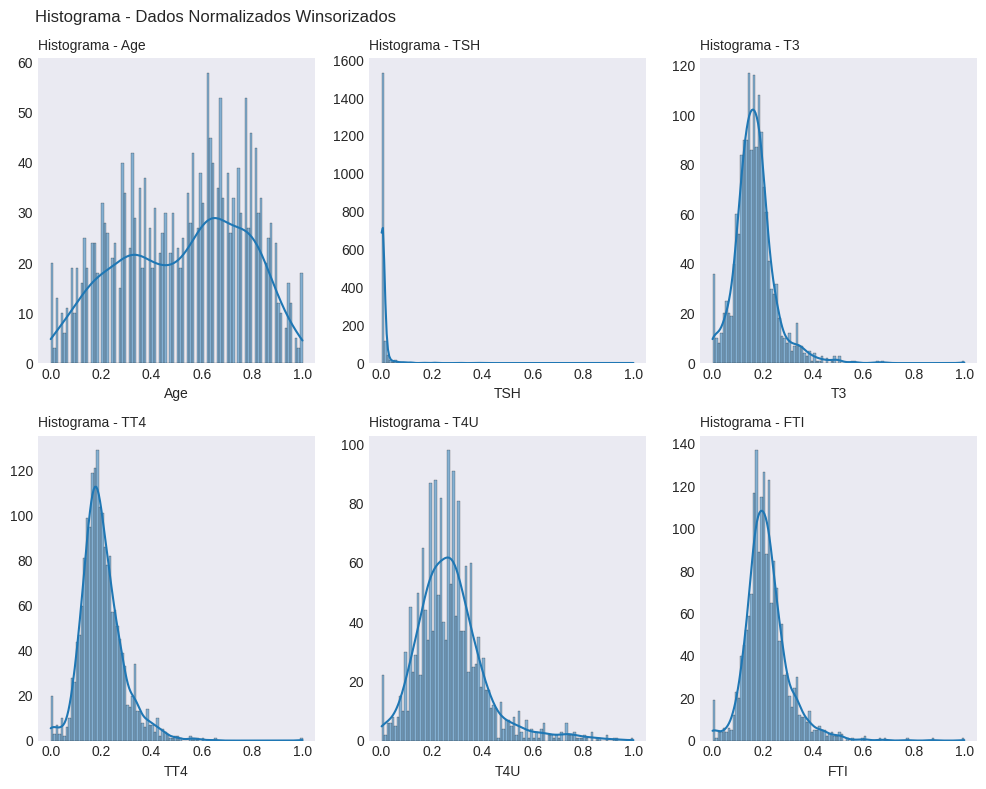

In [43]:
# Histograma para visualizar a distribuição dos valores numéricos

colunas_float = ["Age", "TSH", "T3", "TT4", "T4U", "FTI"]

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 8))
ax = ax.flatten()

for idx, col in enumerate(colunas_float):
    dados = df_normalized[col].dropna()
    sns.histplot(dados, bins = 100, kde = True, ax = ax[idx], color = "tab:blue")
    ax[idx].set_title(f"Histograma - {col}", loc = "left", fontsize = 10)
    ax[idx].set_ylabel("")

    xmin, xmax = dados.min(), dados.max()
    margem = (xmax - xmin) * 0.05
    ax[idx].set_xlim(xmin - margem, xmax + margem)

for j in range(len(colunas_float), len(ax)):
    fig.delaxes(ax[j])

plt.suptitle("Histograma - Dados Normalizados Winsorizados", ha = "left", x = 0.04)
plt.tight_layout()
plt.show()

O histograma das colunas numéricas do dataset após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [44]:
# Inicializar o StandardScaler

scaler_std = StandardScaler()

In [45]:
# Aprende média e desvio padrão APENAS de X_train

scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)

# Usa a média e o desvio padrão aprendidos de X_train

X_test_standardized = scaler_std.transform(X_test)

In [46]:
# Exibir as primeiras linhas dos dados padronizados

df_standardized = pd.DataFrame(X_train_standardized, columns = X_train.columns)
df_standardized.head()

,Age,Sex,On_Thyroxine,Query_On_Thyroxine,On_Antithyroid_Medication,Sick,Pregnant,Thyroid_Surgery,I131_Treatment,Query_Hypothyroid,Query_Hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_Measured,TSH,T3_Measured,T3,TT4_Measured,TT4,T4U_Measured,T4U,FTI_Measured,FTI,TBG_Measured
0,0.707569,0.69391,-0.357500,-0.126802,-0.118217,-0.200901,-0.126802,-0.115977,-0.134875,-0.25088,-0.259952,-0.075145,-0.098964,-0.168364,-0.022599,-0.227002,0.328682,-0.095358,0.495370,0.214769,0.254311,-1.055593,0.336256,-0.046325,0.334372,-1.172647,0.0
1,-0.532741,-1.44111,-0.357500,-0.126802,-0.118217,-0.200901,-0.126802,-0.115977,-0.134875,-0.25088,-0.259952,-0.075145,-0.098964,-0.168364,-0.022599,-0.227002,0.328682,-0.084121,0.495370,-0.025766,0.254311,-1.202265,0.336256,-0.663597,0.334372,-1.045263,0.0
2,0.222230,0.69391,-0.357500,7.886289,-0.118217,-0.200901,-0.126802,-0.115977,-0.134875,-0.25088,-0.259952,-0.075145,-0.098964,5.939510,-0.022599,-0.227002,0.328682,0.050719,-2.018695,NaN,0.254311,0.821810,0.336256,1.445416,0.334372,-0.121727,0.0
3,-0.209182,0.69391,-0.357500,-0.126802,-0.118217,-0.200901,-0.126802,-0.115977,-0.134875,-0.25088,-0.259952,-0.075145,-0.098964,-0.168364,-0.022599,-0.227002,0.328682,-0.233007,0.495370,-0.025766,0.254311,0.440463,0.336256,-0.200643,0.334372,0.610732,0.0
4,0.977202,0.69391,2.797199,-0.126802,-0.118217,-0.200901,-0.126802,-0.115977,-0.134875,-0.25088,-0.259952,-0.075145,-0.098964,-0.168364,-0.022599,-0.227002,0.328682,-0.232446,0.495370,-0.146034,0.254311,1.936518,-2.973924,NaN,-2.990679,NaN,0.0


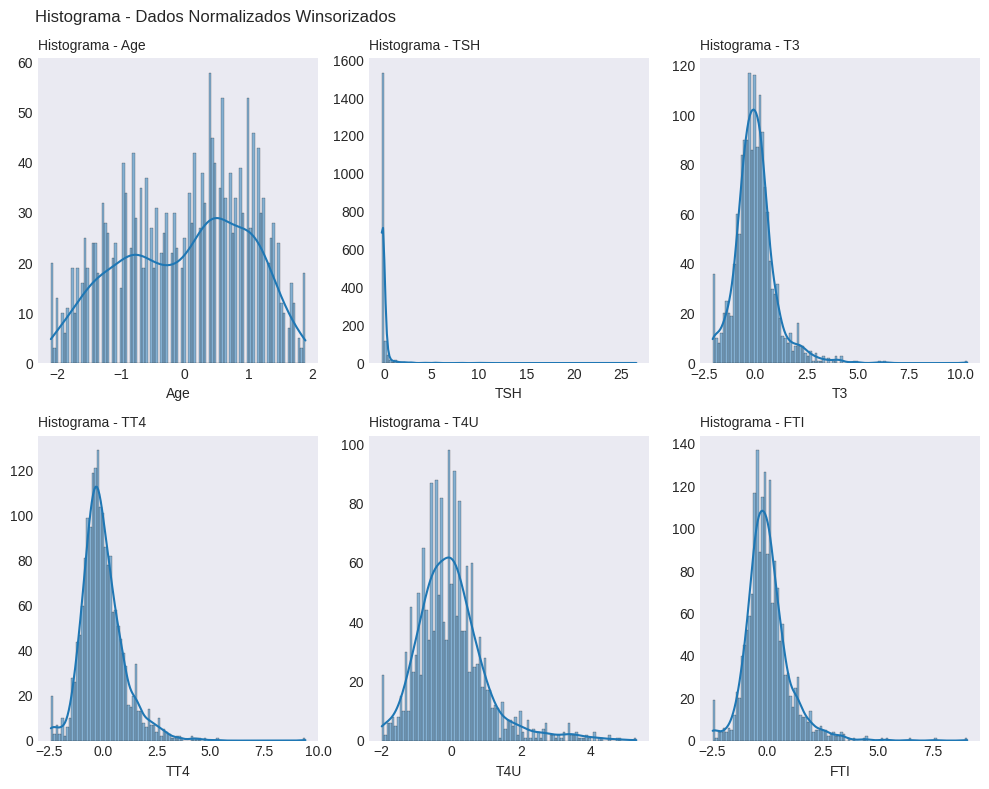

In [47]:
# Histograma para visualizar a distribuição dos valores numéricos

colunas_float = ["Age", "TSH", "T3", "TT4", "T4U", "FTI"]

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 8))
ax = ax.flatten()

for idx, col in enumerate(colunas_float):
    dados = df_standardized[col].dropna()
    sns.histplot(dados, bins = 100, kde = True, ax = ax[idx], color = "tab:blue")
    ax[idx].set_title(f"Histograma - {col}", loc = "left", fontsize = 10)
    ax[idx].set_ylabel("")

    xmin, xmax = dados.min(), dados.max()
    margem = (xmax - xmin) * 0.05
    ax[idx].set_xlim(xmin - margem, xmax + margem)

for j in range(len(colunas_float), len(ax)):
    fig.delaxes(ax[j])

plt.suptitle("Histograma - Dados Normalizados Winsorizados", ha = "left", x = 0.04)
plt.tight_layout()
plt.show()

O histograma de *Thyroid Disease* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

## Outras Transformações e Etapas de Pré-Processamento



### Seleção de Características (Feature Selection)



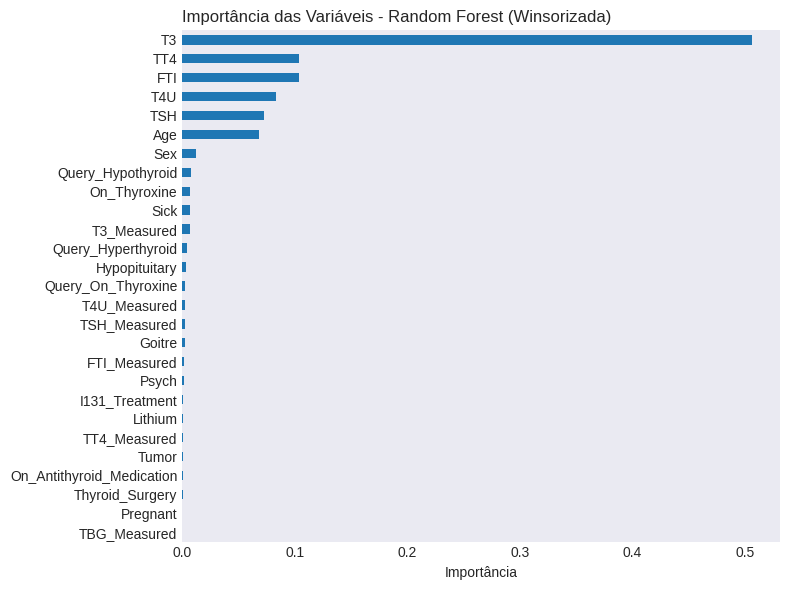

In [48]:
# Utilizando o RandomForestClassifier para avaliar as variáveis por importância

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index = X.columns)
importances.sort_values().plot(kind = "barh", figsize = (8,6))
plt.title('Importância das Variáveis - Random Forest (Winsorizada)', loc = "left")
plt.xlabel('Importância')
plt.tight_layout()
plt.show()

Como já era de se esperar, dado o resultado da Matriz de Correlação Winsorizada, as **variáveis mais importantes para o modelo de predição** são: T3, TT4, FTI, T4U, TSH, Age e Sex.

In [49]:
df_modelo = df_winsorizada[["Age", "Sex", "T3", "TT4", "FTI", "T4U", "TSH", "Class"]]

# Matriz com as características selecionadas

df_modelo.head()

,Age,Sex,T3,TT4,FTI,T4U,TSH,Class
0,23.0,1.0,2.0,102.0,NaN,NaN,4.10,0.0
1,46.0,0.0,NaN,109.0,120.0,0.91,0.98,0.0
2,70.0,1.0,1.9,175.0,NaN,NaN,0.16,0.0
3,70.0,1.0,1.2,61.0,70.0,0.87,0.72,0.0
4,18.0,1.0,NaN,183.0,141.0,1.30,0.03,0.0


# Conclusão

A análise e o pré-processamento do conjunto de dados foram fundamentais para garantir a robustez da modelagem preditiva. A etapa exploratória permitiu compreender a distribuição das variáveis, identificar correlações relevantes entre características hormonais e detectar padrões associados às classes alvo. Apesar da presença de valores ausentes — decorrentes da não realização de determinados exames — optou-se por mantê-los no conjunto, respeitando sua natureza informativa no contexto clínico. A seleção de características, conduzida com base na importância atribuída pelo RandomForestClassifier, destacou as variáveis mais relevantes para o problema, contribuindo para a redução da dimensionalidade e aprimoramento da interpretabilidade do modelo. Todo esse processo reforça a importância de uma preparação cuidadosa dos dados antes da modelagem, assegurando que os algoritmos de aprendizado de máquina operem com qualidade e eficiência diante da complexidade do domínio analisado.

Com relação às três hipóteses levantadas:

- Problemas de tireoide são mais recorrentes em determinado gênero/idade? Mulheres são mais propensas a desenvolver problemas de tireoide? *Por meio dos dados, é possível identificar que problemas de tireoide são mais diagnosticados em pessoas do gênero feminino. A faixa etária predominante dos diagnósticos dessa amostra é de 60 - 80 anos.*

- Há alguma relação entre a presença de doenças psiquiátricas e disfunções tireoidianas? *Pela análise da Matriz de Correlação e pela análise das variáveis mais relevantes para predição, não foi possível identificar correlação direta entre doenças psiquiátricas e disfunções tireoidianas.*

- Pacientes com TSH elevado têm maior possibilidade de serem diagnosticados com hipotireoidismo? Quais outros hormônios podem contribuir para esse diagnóstico? *Por meio da Matriz de Correlação, não é possível afirmar relação direta entre pacientes com TSH elevado e o diagnóstico de hipotireoidismo. Pode-se afirmar, porém, que o T3 decresce à medida que o TSH aumenta, sendo que o T3 é o hormônio de maior influência na classificação do paciente com doença tireoidiana ou não. Demais hormônios, como TT4, T4U e FTI também influenciam na classificação.*